In [2]:
import matplotlib.pyplot as plt
import glob
import cv2
import os
import random
import numpy as np

%matplotlib inline

In [3]:
images = glob.glob('../../advertisinggender/data/processed/gender_4/test/**')

In [4]:
max_rows = 5
max_cols = 20

In [51]:
def resize(img, n=500, center=False):
    h, w = img.shape[:2]
    dim = (500, 500)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

decade is 5
decade is 6
decade is 7
decade is 8
decade is 9


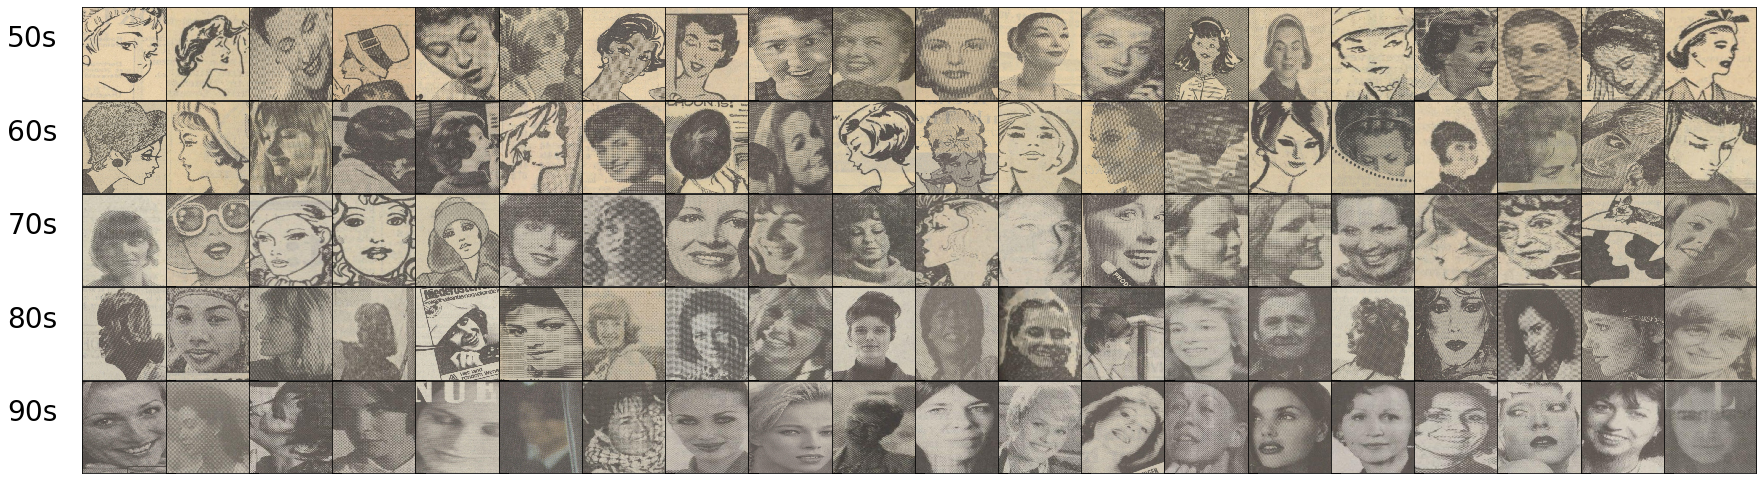

In [75]:
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30, 10), sharey=True)
rows = ['{}s'.format(row) for row in [50, 60, 70, 80, 90]]

random.shuffle(images)

for decade_ in range(5, 10):
    counter = 0
    print(f'decade is {decade_}')
    
    for idx, image_path in enumerate(images):
        if counter == 20: 
            break
        filename = os.path.basename(image_path)
        decade = int(filename.split('_')[0][2:3])
        if decade_ == decade:
            row = decade_ - 5
            axes[row, counter].set_xticks([])
            axes[row, counter].set_yticks([])
            if filename.split('_')[2] == 'f.jpg':
                
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                h, w = img.shape[:2]
                if w > 200 or h > 200:
                    img = resize(img, 500)
                    axes[row, counter].imshow(img.astype('uint8'), cmap="gray")
                    counter += 1



for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, fontsize=28, labelpad=50)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-.1, hspace=-.45)
plt.savefig('female_face_plot.jpg', dpi=300)  
plt.show()  
    